# Task 1) Import Data

In [3]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# data set path

path = r"/Users/martin/anaconda_projects/11-02-2025 Instacart Basket Analysis"

In [5]:
# import merged data set (from part1) 

df_merged = pd.read_pickle(os.path.join(path, '02 data' , 'Prepared Data' , 'orders_products_customers_combined.pkl'))

In [6]:
# get an overview of the data

df_merged.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,median_days_since_order,order_frequency_flag,customer_name,gender,state,age,date_joined,num_dependants,family_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,0,2539329,1,prior,1,2,8,NaN,14084,2,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,0,2539329,1,prior,1,2,8,NaN,12427,3,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,0,2539329,1,prior,1,2,8,NaN,26088,4,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,0,2539329,1,prior,1,2,8,NaN,26405,5,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


# Task 3) Create a histogram 

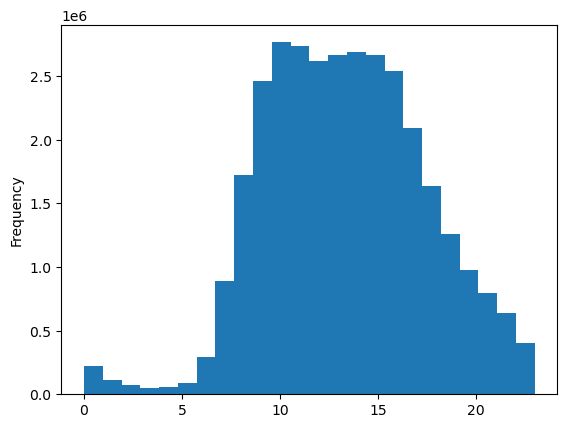

In [8]:
# creating a histogram of the “order_hour_of_day” column

hist = df_merged['order_hour_of_day'].plot.hist(bins = 24)

### Exporting the line chart

In [31]:
# Save the graphic

hist.figure.savefig(os.path.join(save_path, 'hist_order_hod.png'))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/martin/anaconda_projects/11-02-2025/Instacart Basket Analysis/04 Analysis/Visualizations/hist_order_hod.png'

###  Order Distribution by Hour of the Day  

The histogram illustrates the frequency of orders placed throughout the day.  

####  Key Observations:
- **The highest number of orders occur between 9 AM and 4 PM**, with a peak around **10 AM to 3 PM**.
- **Order volume gradually increases** in the morning hours and declines after the peak period.
- **The lowest order frequencies** are observed during the early morning (midnight to 6 AM) and late-night hours.

####  Possible Explanations:
- The peak in orders **aligns with standard working hours**, suggesting that customers may place orders during breaks or while at work.
- Early morning and late-night hours have **fewer orders**, likely due to people sleeping or being less engaged in grocery shopping.
- The **mid-morning to afternoon window** may represent the most active shopping time, possibly driven by meal planning and routine purchases.

####  Business Implications:
- Instacart could **optimize promotions and delivery slots** to match high-traffic hours.
- Marketing strategies could focus on **engaging customers during off-peak hours** to balance demand.
- Further segmentation could analyze **weekend vs. weekday trends** to refine promotional campaigns.

---
 **Conclusion:** The data suggests that most orders are placed during the late morning and early afternoon hours. Understanding customer behavior at different times of the day can help optimize operations and marketing strategies.


# Task 4) Create a bar chart

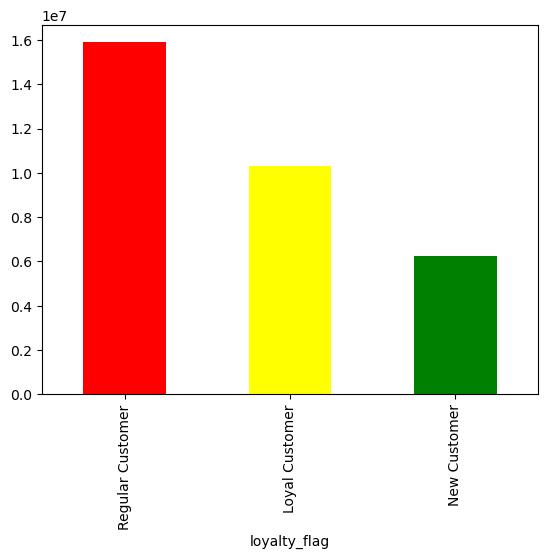

In [21]:
# by using function

bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['red', 'yellow', 'green'])

### Exporting the line chart

In [ ]:
# Save the graphic

bar.figure.savefig(os.path.join(save_path, 'bar_loyalty_flag.png'))

###  Customer Loyalty Distribution  

The bar chart illustrates the distribution of orders based on customer loyalty, as categorized by the **"loyalty_flag"** column.  

####  Key Insights:
- The **majority of orders** come from **loyal customers** (red), indicating that a significant portion of Instacart's revenue is driven by repeat shoppers.
- The **regular customers** (yellow) make up the second-largest group, suggesting they are engaged but have not yet transitioned into the most loyal segment.
- The **new customers** (green) contribute the smallest share of orders, highlighting a potential opportunity for targeted marketing strategies to encourage retention.

####  Business Implications:
- **Loyal customers** represent a valuable segment and should be prioritized in retention campaigns, offering them personalized promotions and rewards.
- **Regular customers** have high conversion potential—targeted incentives may help move them into the loyal segment.
- **New customers** should be nurtured through onboarding programs, welcome discounts, and engagement strategies to increase their likelihood of becoming repeat buyers.

---
 **Conclusion:** The distribution suggests that Instacart benefits greatly from its loyal customer base. Focusing on customer retention strategies and personalized offers could further strengthen this segment while increasing engagement among new and regular customers.


# Task 5) Create a line chart

### Step 1. Create sampling data

In [ ]:
np.random.seed(4)  # For reproducibility
dev = np.random.rand(len(df_merged)) <= 0.7  # 70% True, 30% False

# Create training and test sets based on the random sample
big = df_merged[dev]  # 70% of the data for the analysis
small = df_merged[~dev]  # 30% remain as a holdout set

In [ ]:
# Check the exact number of rows in the whole dataframe

len(df_merged)

In [ ]:
# Check if dataframe big & small combined are having the same amount of rows

len(big) + len(small)

In [ ]:
# Next: reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.

df_2 = small[['order_hour_of_day','prices']]

### Step 2. Create the line chart

In [ ]:
# Now, you’re finally ready to create your chart. Go ahead and execute the following code:

line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

### Exporting the line chart

In [ ]:
# Save the graphic
line.figure.savefig(os.path.join(save_path, 'line2_order_prices_dow.png'))

###  Expenditure Analysis by Hour of the Day  

The line chart illustrates the **average spending (`prices` column) over different hours of the day**.  

####  Key Observations:
- A **significant peak** in expenditures occurs **between 4-6 AM**, where the average spending is noticeably higher than during the rest of the day.
- After this peak, **spending stabilizes** throughout the day, with minor fluctuations between **10 and 20 USD**.
- The **lowest expenditure levels** are seen during late-night hours.

####  Possible Explanations:
- The early-morning **spike in spending** could be due to:
  - **Bulk or business orders** that are placed automatically.
  - **Specific customer segments**, such as night-shift workers or early-morning shoppers.
  - **High-value product categories**, which might be more frequently ordered at these hours.
- Throughout the rest of the day, spending remains **consistent**, likely due to typical grocery shopping habits.

####  Further Analysis:
To better understand these patterns, additional analysis could explore:
- **Product categories** contributing to the early-morning spike.
- **Customer segmentation**: Do high-spending customers follow a specific shopping pattern?
- **Differences between weekdays and weekends** to determine if these trends are work-related.

---
 **Conclusion:** The data suggests that **high-value purchases** are disproportionately made in the early morning, while spending remains steady for the rest of the day. Identifying the customer groups responsible for these trends could provide valuable business insights.  


# Task 6) Create a line chart

### Step 1. Create sampling data

In [ ]:
np.random.seed(6)  # For reproducibility
dev_6 = np.random.rand(len(df_merged)) <= 0.7  # 70% True, 30% False

# Create training and test sets based on the random sample
big_6 = df_merged[dev_6]  # 70% of the data for the analysis
small_6 = df_merged[~dev_6]  # 30% remain as a holdout set

In [ ]:
# Next: reducing your samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.

df_6 = small[['age','num_dependants']]

### Step 2. Create the line chart

In [ ]:
line_6 = sns.lineplot(data = df_6, x = 'age',y = 'num_dependants')

### Exporting the line chart

In [ ]:
# Save the graphic
line_6.figure.savefig(os.path.join(save_path, 'line6_order_prices_dow.png'))

###  Relationship Between Age and Number of Dependents  

The line chart illustrates the relationship between **customer age** and their **average number of dependents**.  

####  Key Observations:
- The data does not show a **strong linear trend**, but rather **fluctuations** across different age groups.  
- The number of dependents appears to be relatively **stable**, fluctuating slightly around **1.5 dependents per customer** across all age groups.  
- There are **small peaks and dips**, but no clear increase or decrease with age.  

####  Possible Explanations:
- This pattern suggests that **family structures remain relatively constant across age groups**, likely due to a mix of different household types (e.g., families with children, multi-generational households).
- The **variability in the older age groups** could be due to **smaller sample sizes**, making the trend appear less stable.
- A deeper analysis could segment customers based on **lifestyle factors** to check if spending behavior correlates with family size.  

####  Business Implications:
- **Targeted marketing campaigns** should focus on behavioral segments rather than age alone, as age does not seem to be a strong predictor of family size.
- Further analysis could explore **differences in spending habits between customers with and without dependents** to refine marketing strategies.  

---
 **Conclusion:** The analysis suggests that while family size is relatively stable across age groups, there may be underlying segments influencing purchasing behavior that should be explored further.


# Task 7) Creating a Scatter Plot

In [ ]:
# a scatter plot can be used to visually identify potential outliers in the data using the following code:

sns.scatterplot(x = 'age', y = 'income',data = df_merged)

###  Relationship Between Age and Income  

The scatter plot visualizes the relationship between **customer age** and **income**, helping to identify potential outliers.  

####  Key Observations:
- The majority of customers have an income **below 200,000 USD**, indicating a typical income distribution.
- There are **numerous high-income outliers**, particularly above **400,000 USD**, which may represent high-net-worth individuals or potential data anomalies.
- The distribution suggests that **income variability increases with age**, meaning older customers exhibit a wider range of income levels.

####  Possible Explanations:
- The high-income outliers could represent **executives, business owners, or retirees with significant financial assets**.
- Younger customers tend to have a **lower and more consistent income**, which aligns with career progression patterns.
- There is **no clear linear correlation** between age and income, indicating that other factors (e.g., occupation, education) likely play a role.

####  Business Implications:
- Marketing strategies should consider **segmenting customers by income brackets** rather than solely by age.
- **High-income customers** could be targeted with premium product recommendations.
- Additional filtering or **outlier treatment** may be necessary to ensure accurate data analysis.

---
 **Conclusion:** The analysis highlights **income variability across age groups** and the presence of **high-income outliers**, which may require further investigation for refined customer segmentation.


In [ ]:
# Export data to pkl
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_combined_2.pkl'))